# Example of match data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sf6_match_collection import scrapp_sf6_matches

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# PLAYER_SID = 1572500566 # MDZ_Jimmy
PLAYER_SID: int = 3570388222 # Broski

scrapp_sf6_matches(PLAYER_SID)

This script will save on 'player_3570388222_sf6_matches.xlsx' file. Make sure it is closed and press ENTER to proceed.

Fetching the last 100 matches...


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]



Total of 53 new matche(s) retrieved.
162 matches are now saved in 'player_3570388222_sf6_matches.xlsx' file.



In [3]:
file_name = f"player_{PLAYER_SID}_sf6_matches.xlsx"

In [4]:
data = pd.read_excel(file_name)
data["left_side"] = data["left_side"].map({0: "Right side", 1: "Left Side"})

last_day = str(data["uploaded_at"].max().date())

df_last_session = data[data["uploaded_at"].map(lambda d: str(d.date()) == last_day)]
data.head(n=5)

,main_player_name,main_player_sid,main_player_character,main_player_score,main_player_league_rank,main_player_lp,main_player_mr,main_player_mr_ranking,main_player_input_type,main_player_platform,opposite_player_name,opposite_player_sid,opposite_player_character,opposite_player_score,opposite_player_league_rank,opposite_player_lp,opposite_player_mr,opposite_player_mr_ranking,opposite_player_input_type,opposite_player_platform,match_won,left_side,uploaded_at,replay_id,replay_battle_type_name
0,Broski,3570388222,A.K.I.,2,36,692954,2010,99,0,Steam,soixante,3960621826,Kimberly,0,36,317739,1813,99,0,Steam,1,Right side,2025-02-21 17:11:51,KEYJ5W4SP,Ranked Match
1,Broski,3570388222,A.K.I.,2,36,692904,2005,113,0,Steam,rapiD,3909313524,JP,0,36,464245,1880,113,0,Steam,1,Right side,2025-02-21 17:08:29,K6PU5QVWT,Ranked Match
2,Broski,3570388222,A.K.I.,2,36,692854,2000,132,0,Steam,rapiD,3909313524,JP,1,36,464285,1885,132,0,Steam,1,Right side,2025-02-21 17:06:15,T63GSJXLS,Ranked Match
3,Broski,3570388222,A.K.I.,2,36,692804,1999,131,0,Steam,YNK_Neo,1004621834,Luke,1,36,158331,1574,131,0,Steam,1,Right side,2025-02-20 21:20:29,KRGY9AW4W,Ranked Match
4,Broski,3570388222,A.K.I.,2,36,692754,1998,131,0,Steam,YNK_Neo,1004621834,Luke,0,36,158371,1575,131,0,Steam,1,Right side,2025-02-20 21:16:56,887NTR6AN,Ranked Match


In [5]:
def match_reports(df):
    
    sep = "\n" + 20 * "-" + "\n"
    
    print("Number of matches:", len(df), end=sep)
    
    pie_chart_format_high = lambda x: f"{round(x / 100 * len(df))}"
    pie_chart_format_low = lambda x: f"{round(x / 100 * len(df))} ({round(x, 2)} %)"
    
    
    
    for col in ["match_won", "replay_battle_type_name", "opposite_player_character", "left_side"]:
        pie_chart_format = pie_chart_format_high if col == "opposite_player_character" else pie_chart_format_low
        plt.figure()
        df[col].value_counts().plot.pie(
            autopct=pie_chart_format,
            figsize=(8, 6)
        )
        plt.title(col)
        plt.ylabel(None)
        
    print("% of match won", round(df["match_won"].mean() * 100, 2), "%", end=sep)
    print(df[["left_side", "match_won"]].groupby("left_side").mean(), end=sep)
    print(df[["opposite_player_character", "match_won"]].groupby("opposite_player_character").mean(), end=sep)
    
    print("Highest MR", df['main_player_mr'].max(), end=sep)
    print("Highest World Ranking", df['main_player_mr_ranking'].min(), end=sep)

    highest_winstreak = max(len(seq) for seq in "".join(df["match_won"].map(str)).split("0"))

    print("Highest winstreak (assuming no gap in match saved):", highest_winstreak, end=sep)
    
    df_ranked = df[df["replay_battle_type_name"] == "Ranked Match"]

    plt.figure(figsize=(8, 6))

    plt.plot(df_ranked["main_player_mr"].to_list()[::-1], label="Main Player MR")
    plt.plot(df_ranked["opposite_player_mr"].to_list()[::-1], label="Opposite Player MR")

    plt.grid(True)
    plt.legend()
    plt.xlabel("Match")
    plt.ylabel("MR")
    plt.title("Ranked matches MR Evolution")

## Latest session stats

Number of matches: 3
--------------------
% of match won 100.0 %
--------------------
            match_won
left_side            
Right side        1.0
--------------------
                           match_won
opposite_player_character           
JP                               1.0
Kimberly                         1.0
--------------------
Highest MR 2010
--------------------
Highest World Ranking 99
--------------------
Highest winstreak (assuming no gap in match saved): 3
--------------------


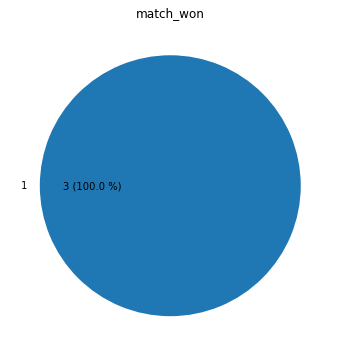

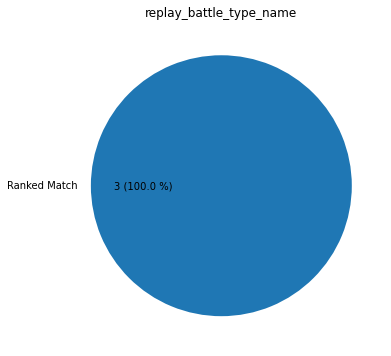

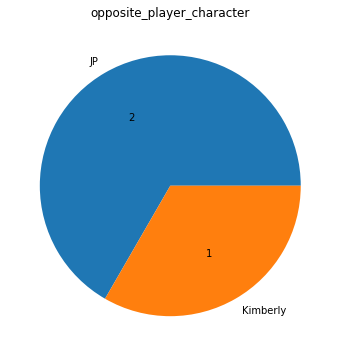

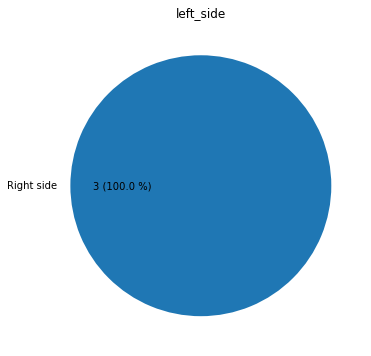

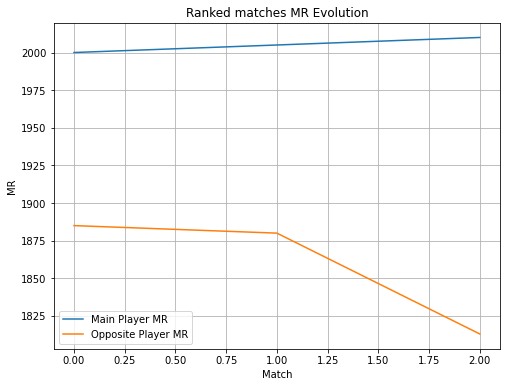

In [6]:
match_reports(df_last_session)

## Total matches stats

Number of matches: 162
--------------------
% of match won 73.46 %
--------------------
            match_won
left_side            
Left Side    0.720000
Right side   0.747126
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.615385
Akuma                       0.777778
Blanka                      0.857143
Cammy                       0.636364
Dee Jay                     0.576923
Dhalsim                     0.888889
Edmond Honda                1.000000
JP                          0.500000
Jamie                       0.666667
Juri                        0.600000
Ken                         0.750000
Kimberly                    1.000000
Luke                        0.714286
M. Bison                    0.666667
Mai                         1.000000
Marisa                      0.714286
Rashid                      1.000000
Ryu                         1.000000
Zangief                     0.714286
--------------------
Highe

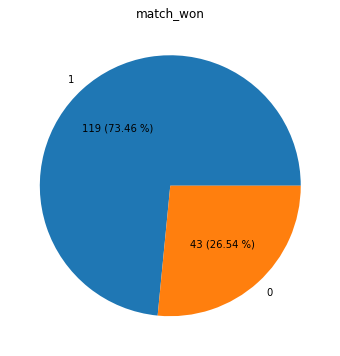

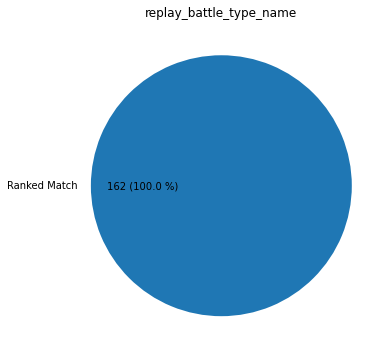

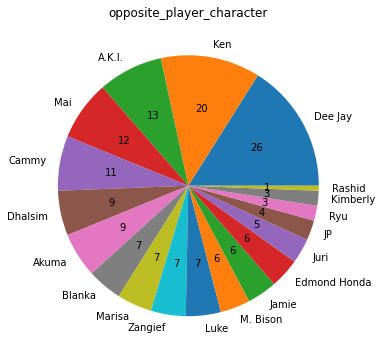

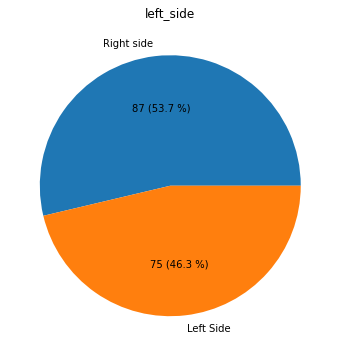

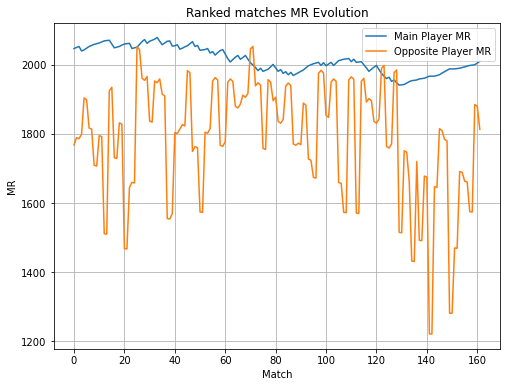

In [7]:
match_reports(data)